#                                    Machine learning Bike Sharing Assignment 

In [110]:
# Importing all requried Liberies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from datetime import datetime
import statsmodels 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [111]:
# reading the Bike sharing data
bike_data = pd.read_csv("d:/day.csv")

In [112]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [113]:
# Checking the size or shape of the data frame
bike_data.shape

(730, 16)

In [114]:
# checking the dataframe information
bike_data.info() # Null values are not present in the preset data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [115]:
# Checking the data frame statistics
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


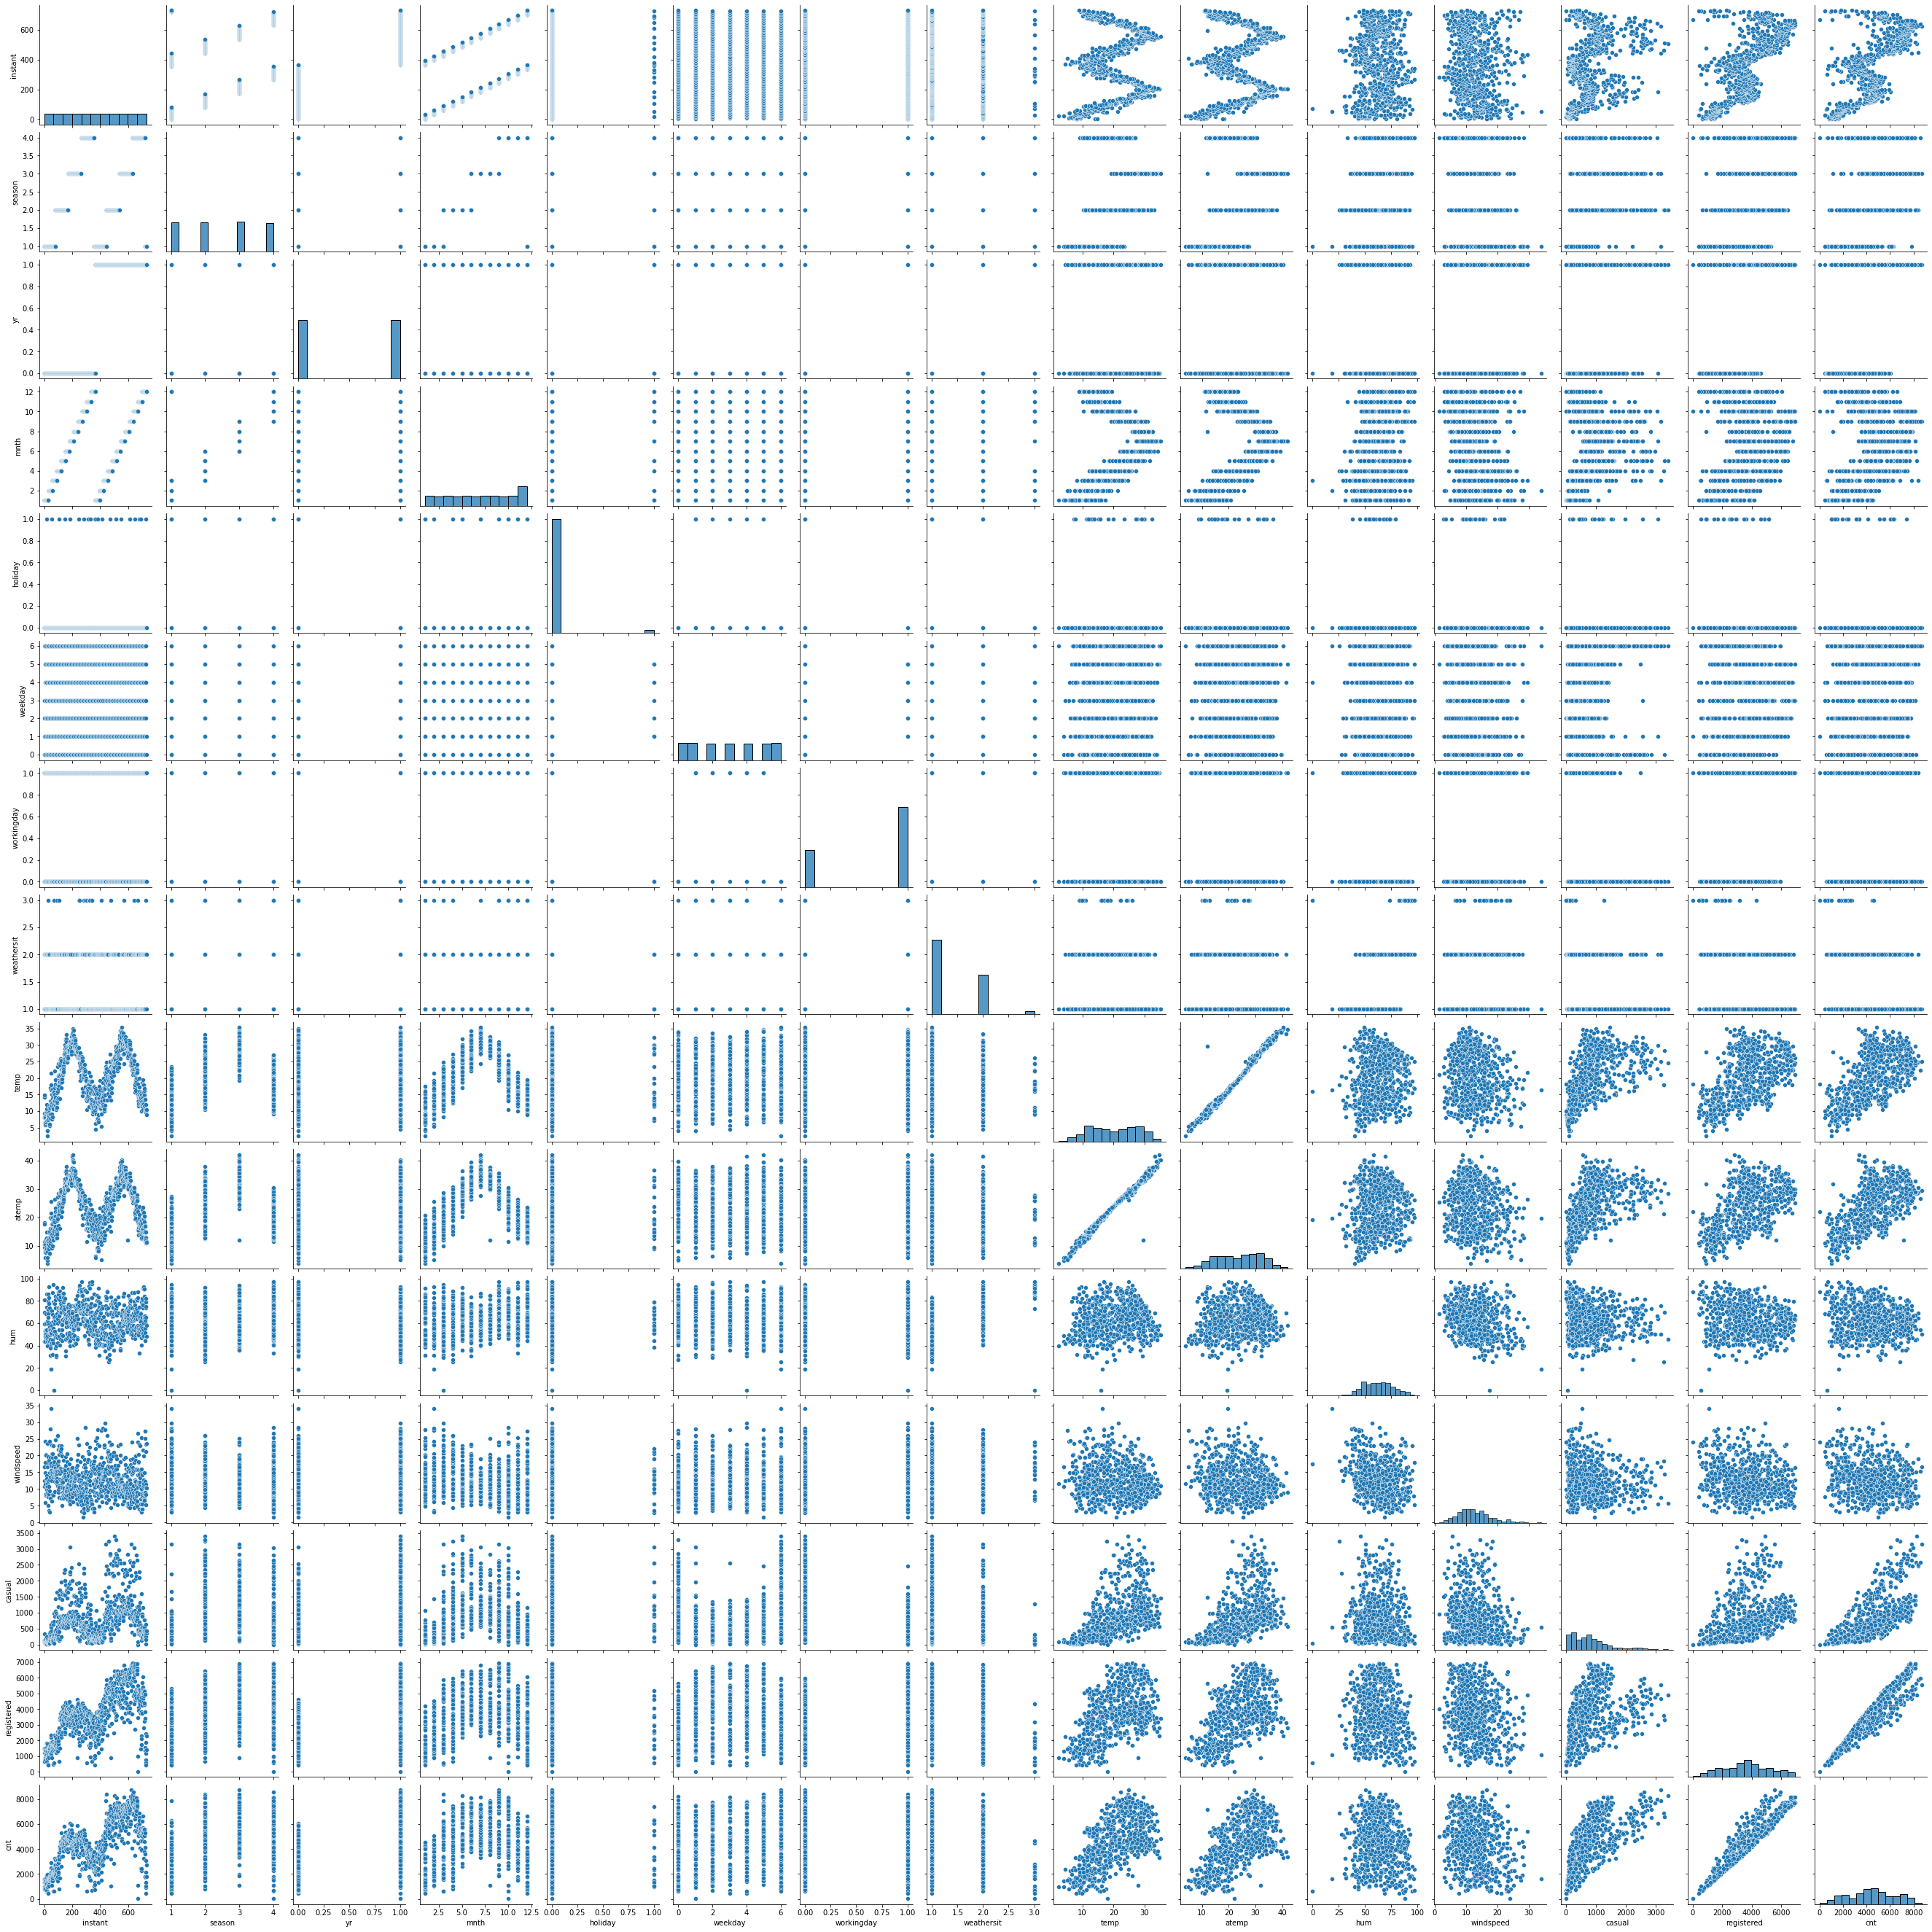

In [116]:
# checking the relation between all the variables
sns.pairplot(bike_data)
plt.show()

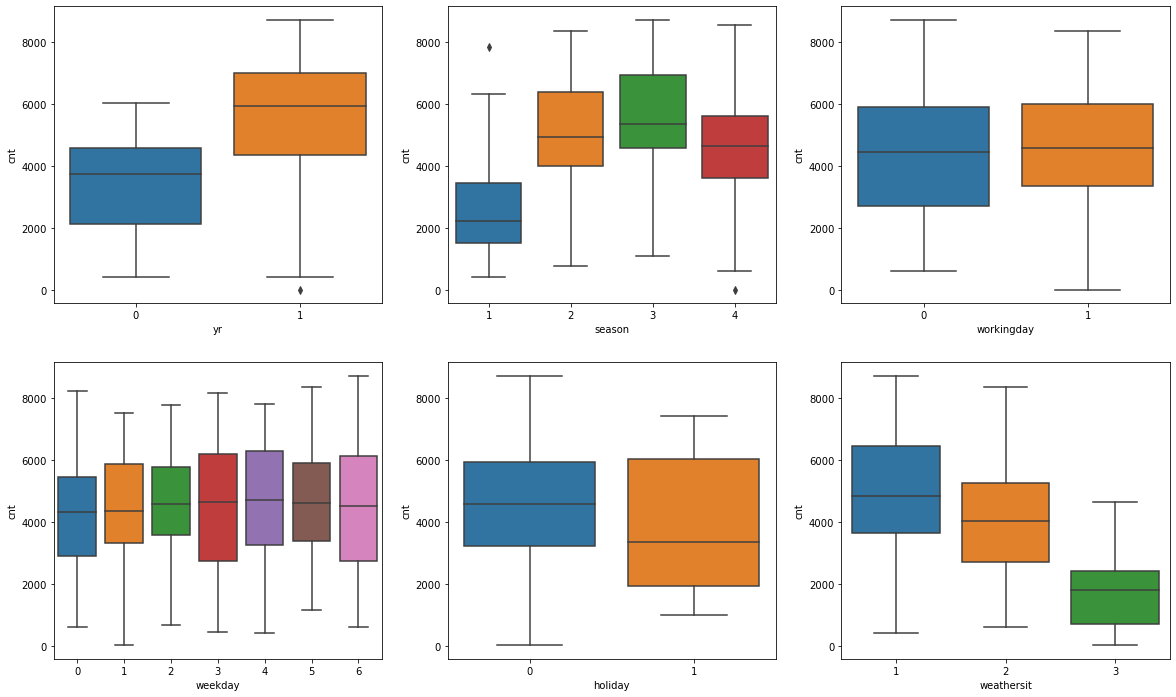

In [117]:
# visualising the Categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()

## Step 2: Preparing Data for modelling
- Encoding 
  - other categorical vars to dummy variables

In [118]:
# Droping the instant coloumn which is not carring any valid information about the bike sharing it is just a count of elements.
# Droping date variable since we have three coloumns having week ,working and holiday day information so this coloumn may not be usful information for our analysis
#considering this variable can create a misleading while creating a model
bike_data.drop(["instant","dteday"],axis=1,inplace= True)

In [119]:
# Dropping Casual and registered coloumns because the both combines makes the cnt coloumn 
# as per the problem statement we have to concentrate on demand for Bike share both casual and registered.
bike_data.drop(["casual","registered"],axis=1,inplace=True)

In [120]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [121]:
bike_data.weathersit.head()

0    2
1    2
2    1
3    1
4    1
Name: weathersit, dtype: int64

In [122]:
bike_data.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [123]:
# converting the numeric variables to Strings to create into Dummy variables
bike_data.weathersit = bike_data['weathersit'].apply(lambda x: 'Sunny' if x==1 else 'Misty' if x==2 else 'Snowy' if x==3 else "Rainy")

In [124]:
bike_data.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [125]:
bike_data.weathersit.head()

0    Misty
1    Misty
2    Sunny
3    Sunny
4    Sunny
Name: weathersit, dtype: object

In [126]:
# Creating Dummy variables for weathersit categorical variable
dummy = pd.get_dummies(bike_data['weathersit'])
dummy.head()

,Misty,Snowy,Sunny
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [127]:
bike_data.season.head()

0    1
1    1
2    1
3    1
4    1
Name: season, dtype: int64

In [128]:
# Concating the Weathersit dummy variables to main data frame
bike_data = pd.concat([bike_data , dummy],axis=1)

In [129]:
# Since we added the dummy variables for Weathersit actegorical variable so droping the season variable
bike_data = bike_data.drop("weathersit", axis=1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Misty,Snowy,Sunny
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1


In [130]:
# converting the numeric variables to Strings to create into Dummy variables
bike_data.season = bike_data['season'].apply(lambda x: 'spring' if x==1 else 'summer' if x==2 else 'fall' if(x==3) else "winter")

In [131]:
bike_data.season.head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

In [132]:
# Creating Dummy variables for Season categorical variable
dummy = pd.get_dummies(bike_data['season'],drop_first=True)
dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [133]:
# Concating the season dummy variables to main data frame
bike_data = pd.concat([bike_data , dummy],axis=1)

In [134]:
# Since we added the dummy variables for Season actegorical variable so droping the season variable
bike_data = bike_data.drop("season", axis=1)
bike_data.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Misty,Snowy,Sunny,spring,summer,winter
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,1,0,0


In [135]:
# converting the numeric variables to Strings to create into Dummy variables
weekdays = {0: "sunday",1: "monday",2: "tuesday",3: "wednesday",4: "thursday",5: "friday",6: "saturday"}
months = {1: "january",2: "february",3: "march",4: "april",5: "may",6: "june",7: "july",8 :"august",9 :"september",10 :"october",11 :"november",12 :"december"}
bike_data['weekday'].replace(weekdays,inplace=True)
bike_data['mnth'].replace(months,inplace=True)


In [136]:
bike_data.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Misty,Snowy,Sunny,spring,summer,winter
0,0,january,0,saturday,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0
1,0,january,0,sunday,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0
2,0,january,0,monday,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,1,0,0
3,0,january,0,tuesday,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,1,0,0
4,0,january,0,wednesday,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,1,0,0


In [137]:
bike_data.dtypes

yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
Misty           uint8
Snowy           uint8
Sunny           uint8
spring          uint8
summer          uint8
winter          uint8
dtype: object

In [138]:
# Creating Dummy variables for weekdays and months categorical variable
dummy_weekdays = pd.get_dummies(bike_data['weekday'],drop_first=True)
dummy_months = pd.get_dummies(bike_data['mnth'],drop_first=True)


In [139]:
# Concating the weekdays and months dummy variables to main data frame
bike_data = pd.concat([bike_data , dummy_weekdays,dummy_months],axis=1)

In [140]:
# Since we added the dummy variables for mn actegorical variable so droping the season variable
bike_data = bike_data.drop(["weekday","mnth"], axis=1)
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Misty,Snowy,...,december,february,january,july,june,march,may,november,october,september
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,1,0,0,0,0,0,0,0


In [141]:
bike_data.corr() #correlation

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Misty,Snowy,...,december,february,january,july,june,march,may,november,october,september
yr,1.000000e+00,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728,-0.005796,-0.073758,...,3.709668e-17,-2.801585e-16,5.516768e-17,1.465455e-16,-2.089634e-16,1.599112e-16,7.671648e-17,-2.983215e-17,8.571788e-17,-2.138778e-17
holiday,8.195345e-03,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,-0.018668,-0.029619,...,6.362682e-03,1.198013e-02,3.575989e-02,6.362682e-03,-5.150208e-02,-5.243172e-02,6.362682e-03,6.785194e-02,6.362682e-03,8.174933e-03
workingday,-2.945396e-03,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542,0.048877,0.028990,...,-1.458882e-02,-3.092787e-03,-2.515414e-02,-1.458882e-02,2.130094e-02,2.767245e-02,6.541813e-03,-1.087082e-02,-4.023504e-03,-1.087082e-02
temp,4.878919e-02,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044,-0.096297,-0.058461,...,-2.856645e-01,-3.106261e-01,-4.315050e-01,4.327222e-01,3.083139e-01,-1.749229e-01,1.651884e-01,-2.066901e-01,-1.761584e-02,1.977294e-01
atemp,4.721519e-02,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685,-0.092933,-0.064937,...,-2.774839e-01,-3.108452e-01,-4.390064e-01,4.293501e-01,3.007681e-01,-1.731348e-01,1.704469e-01,-1.968773e-01,-4.775183e-03,1.924774e-01
hum,-1.125471e-01,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.490628,0.267592,...,8.220022e-02,-1.305206e-01,-8.955482e-02,-6.375685e-02,-1.090477e-01,-8.388743e-02,1.312731e-01,-5.837193e-03,1.415566e-01,1.831181e-01
windspeed,-1.162435e-02,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,-0.037177,0.117332,...,-5.461552e-02,9.609291e-02,6.211669e-02,-9.608996e-02,-1.962363e-02,1.265752e-01,-2.953449e-02,-2.587339e-02,-6.013274e-02,-9.482530e-02
cnt,5.697285e-01,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000,-0.170686,-0.240602,...,-1.738782e-01,-2.738478e-01,-3.671673e-01,1.662362e-01,1.955684e-01,-1.284558e-01,1.325529e-01,-4.034360e-02,1.088461e-01,1.946635e-01
Misty,-5.796152e-03,-0.018668,0.048877,-0.096297,-0.092933,0.490628,-0.037177,-0.170686,1.000000,-0.122696,...,6.348421e-02,-9.487306e-03,3.229749e-02,-1.132406e-01,-6.562247e-02,3.229749e-02,4.269306e-02,-5.507084e-02,4.269306e-02,3.989384e-02
Snowy,-7.375810e-02,-0.029619,0.028990,-0.058461,-0.064937,0.267592,0.117332,-0.240602,-0.122696,1.000000,...,3.575989e-02,-1.881387e-02,-2.303452e-02,-2.303452e-02,-5.150208e-02,6.362682e-03,-5.243172e-02,3.801344e-02,9.455429e-02,3.801344e-02


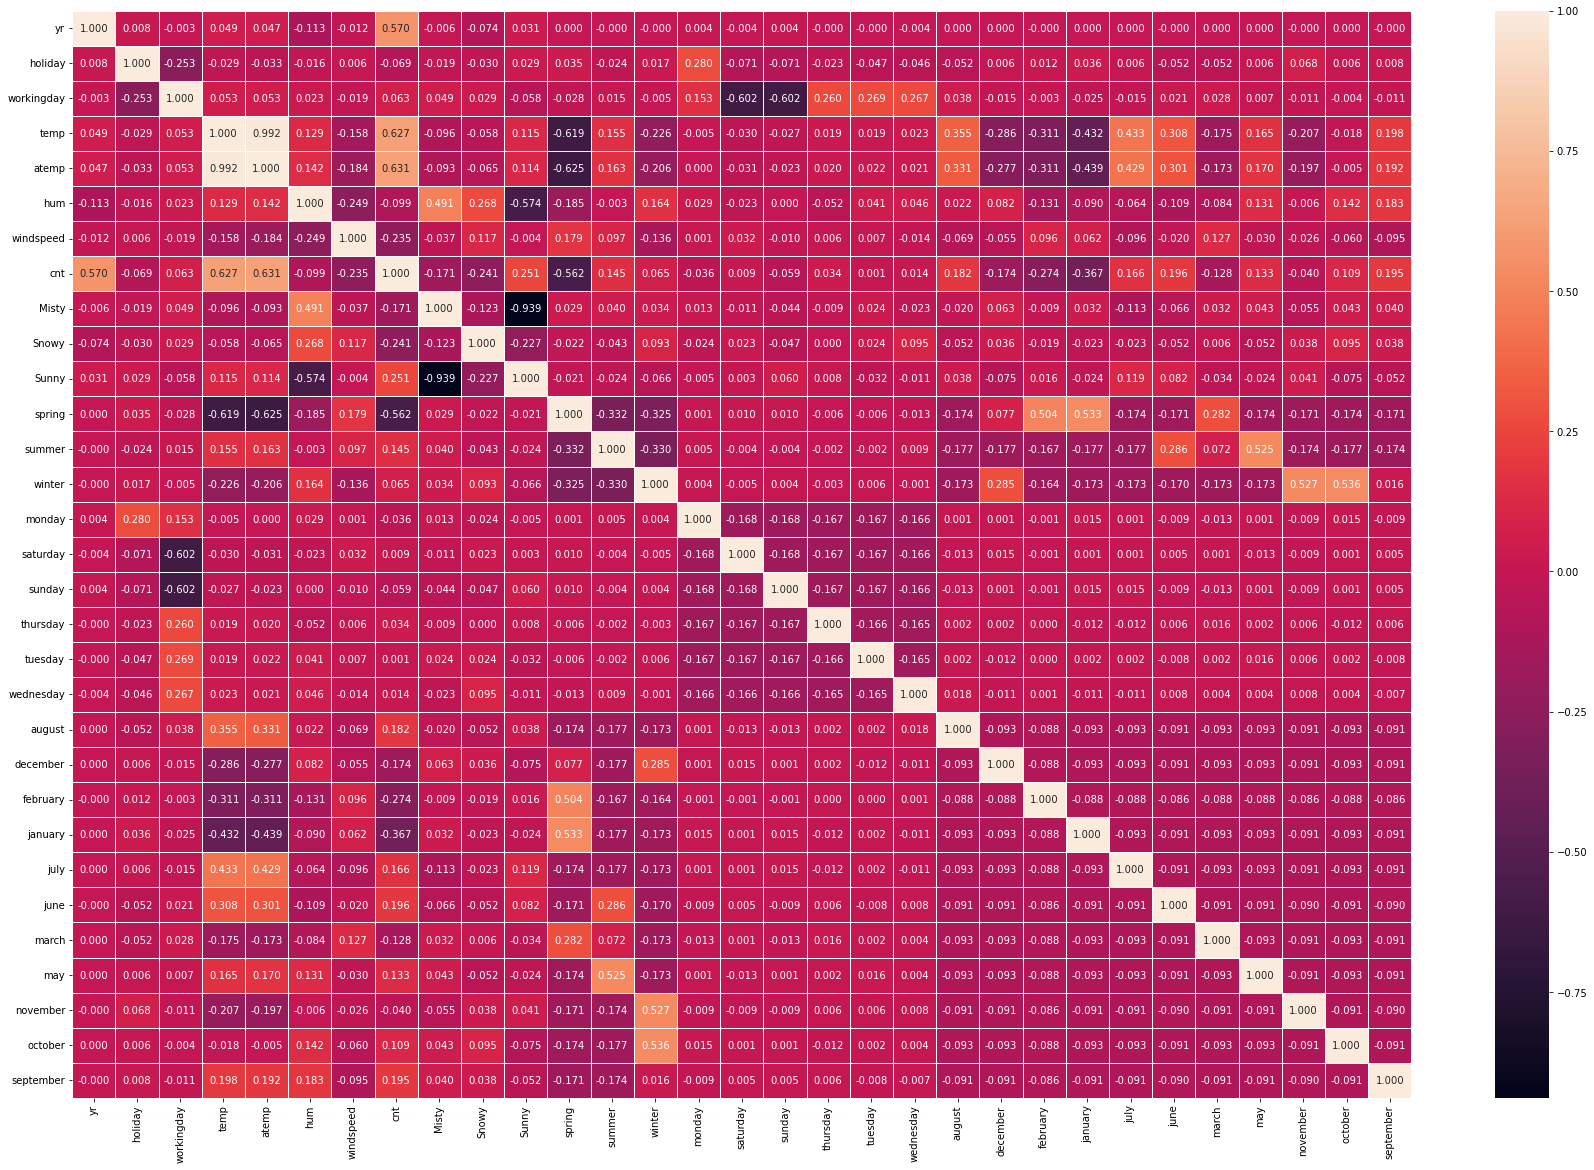

In [142]:
#heat map to see the correlation
plt.figure(figsize=(30, 20))
sns.heatmap(bike_data.corr(),annot= True,linewidth=0.5,fmt=".3f")
plt.show()

## Splitting into Train and Test

In [143]:
bike_train,bike_test = train_test_split(bike_data,train_size=0.75,random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(547, 31)
(183, 31)


In [144]:
# scaling the numerical variables not the binary variables like 1 or 0
scaler = MinMaxScaler()

# Create a list of variables
var =["windspeed","hum","atemp","temp"]
#fit_transform() --> do it together learning min , max and using formulation (x-xmin/(xmax-xmin))
bike_train[var] = scaler.fit_transform(bike_train[var])
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Misty,Snowy,...,december,february,january,july,june,march,may,november,october,september
311,0,0,1,0.435124,0.437339,0.743667,0.057471,4205,0,0,...,0,0,0,0,0,0,0,1,0,0
523,1,0,1,0.735215,0.680985,0.482181,0.286093,7736,0,0,...,0,0,0,0,1,0,0,0,0,0
381,1,0,1,0.391151,0.374375,0.737917,0.659615,2935,1,0,...,0,0,1,0,0,0,0,0,0,0
413,1,0,0,0.358285,0.362754,0.550880,0.319514,4318,0,0,...,0,1,0,0,0,0,0,0,0,0
253,0,0,0,0.740406,0.695906,0.735509,0.156398,5046,0,0,...,0,0,0,0,0,0,0,0,0,1


In [145]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Misty,Snowy,...,december,february,january,july,june,march,may,november,october,september
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.508227,0.027422,0.669104,0.535543,0.511400,0.650673,0.319317,4466.930530,0.349177,0.027422,...,0.087751,0.073126,0.08958,0.071298,0.078611,0.096892,0.084095,0.082267,0.087751,0.080439
std,0.500390,0.163460,0.470966,0.225446,0.211788,0.144515,0.169239,1955.770315,0.477146,0.163460,...,0.283192,0.260582,0.28584,0.257557,0.269376,0.296082,0.277784,0.275022,0.283192,0.272220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336998,0.326287,0.538858,0.197844,3068.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.535847,0.521862,0.655216,0.294101,4492.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.753113,0.413761,5956.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
#X_train,y_train from the bike train data set
y_train=bike_train.pop('cnt')
X_train = bike_train
#print(y_train)

In [147]:
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     110.2
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          4.86e-198
Time:                        00:09:22   Log-Likelihood:                -4390.6
No. Observations:                 547   AIC:                             8839.
Df Residuals:                     518   BIC:                             8964.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1050.8340    248.777      4.224      0.000     562.099    1539.569
yr          2006.1050     66.820     30.023      0.000    1874.834    2137.376
holiday     -260.1504    189.171     -1.375      0.170    -631.787     111.486
workingday   621.0495     94.620      6.564      0.000     435.164     806.935
temp        3403.9176   1199.462      2.838      0.005    1047.509    5760.326
atemp        475.7275   1177.789      0.404      0.686   -1838.103    2789.558
hum        -1275.8645    324.280     -3.934      0.000   -1912.929    -638.800
windspeed  -1541.3466    218.047     -7.069      0.000   -1969.712   -1112.981
Misty        755.4348    108.668      6.952      0.000     541.951     968.918
Snowy       -979.9177    185.410     -5.285      0.000   -1344.165    -615.670
Sunny       1275.3170     96.487     13.218      0.000    1085.764    1464.870
spring      -451.1893    246.879     -1.828      0.068    -936.196      33.817
summer       383.1739    217.620      1.761      0.079     -44.353     810.701
winter       992.5944    228.671      4.341      0.000     543.358    1441.831
monday      -202.6268    128.044     -1.582      0.114    -454.177      48.923
saturday     580.3123    107.963      5.375      0.000     368.213     792.412
sunday       109.6227    109.364      1.002      0.317    -105.229     324.474
thursday     -92.2265    130.497     -0.707      0.480    -348.596     164.143
tuesday     -190.2485    129.077     -1.474      0.141    -443.827      63.330
wednesday    -75.1437    126.087     -0.596      0.551    -322.848     172.561
august       208.3667    282.131      0.739      0.461    -345.895     762.629
december    -435.0712    277.196     -1.570      0.117    -979.637     109.495
february    -240.8471    272.574     -0.884      0.377    -776.333     294.639
january     -481.7265    280.124     -1.720      0.086   -1032.045      68.591
july        -266.9574    292.993     -0.911      0.363    -842.558     308.643
june         117.2118    204.590      0.573      0.567    -284.716     519.139
march         45.7097    209.358      0.218      0.827    -365.585     457.004
may          185.8111    177.348      1.048      0.295    -162.599     534.221
november    -379.7376    302.343     -1.256      0.210    -973.708     214.232
october       83.6110    295.141      0.283      0.777    -496.209     663.431
september    751.7422    266.445      2.821      0.005     228.297    1275.187
==============================================================================
Omnibus:                       92.397   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.688
Skew:                          -0.821   Prob(JB):                     2.47e-57
Kurtosis:                       5.957   Cond. No.                     1.18e+16
==

In [148]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,sunday,inf
7,Misty,inf
1,holiday,inf
14,saturday,inf
8,Snowy,inf
9,Sunny,inf
2,workingday,inf
3,temp,68.88
4,atemp,58.61
10,spring,11.00


In [149]:
X_train = X_train.drop(["march"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     114.5
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          4.60e-199
Time:                        00:09:22   Log-Likelihood:                -4390.7
No. Observations:                 547   AIC:                             8837.
Df Residuals:                     519   BIC:                             8958.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1069.0372    234.175      4.565      0.000     608.990    1529.085
yr          2005.9982     66.756     30.050      0.000    1874.852    2137.144
holiday     -256.2358    188.146     -1.362      0.174    -625.858     113.386
workingday   625.8620     91.932      6.808      0.000     445.258     806.466
temp        3396.9426   1197.936      2.836      0.005    1043.543    5750.343
atemp        468.6913   1176.267      0.398      0.690   -1842.140    2779.522
hum        -1270.0231    322.877     -3.933      0.000   -1904.330    -635.716
windspeed  -1543.8587    217.543     -7.097      0.000   -1971.233   -1116.485
Misty        761.2446    105.262      7.232      0.000     554.452     968.037
Snowy       -973.7336    183.065     -5.319      0.000   -1333.373    -614.094
Sunny       1281.5262     92.116     13.912      0.000    1100.561    1462.491
spring      -433.8700    233.573     -1.858      0.064    -892.735      24.995
summer       373.3067    212.680      1.755      0.080     -44.514     791.127
winter      1002.5069    223.913      4.477      0.000     562.620    1442.394
monday      -202.4534    127.924     -1.583      0.114    -453.767      48.860
saturday     585.5191    105.200      5.566      0.000     378.849     792.189
sunday       113.8919    107.503      1.059      0.290     -97.303     325.087
thursday     -91.0121    130.259     -0.699      0.485    -346.912     164.888
tuesday     -190.0774    128.956     -1.474      0.141    -443.417      63.262
wednesday    -74.8950    125.966     -0.595      0.552    -322.361     172.571
august       186.7274    263.907      0.708      0.480    -331.730     705.185
december    -475.4605    206.248     -2.305      0.022    -880.644     -70.277
february    -285.6680    179.150     -1.595      0.111    -637.617      66.281
january     -528.0063    182.967     -2.886      0.004    -887.453    -168.559
july        -287.4567    277.287     -1.037      0.300    -832.200     257.287
june         102.2823    192.647      0.531      0.596    -276.182     480.747
may          172.0595    165.635      1.039      0.299    -153.338     497.457
november    -416.4443    251.059     -1.659      0.098    -909.661      76.772
october       48.4297    247.045      0.196      0.845    -436.901     533.761
september    726.1512    239.059      3.038      0.003     256.508    1195.794
==============================================================================
Omnibus:                       92.242   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.365
Skew:                          -0.818   Prob(JB):                     1.76e-57
Kurtosis:                       5.965   Cond. No.                     1.18e+16
==============================================================================

N

In [150]:
X_train = X_train.drop(["october"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     119.1
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          4.26e-200
Time:                        00:09:22   Log-Likelihood:                -4390.7
No. Observations:                 547   AIC:                             8835.
Df Residuals:                     520   BIC:                             8952.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1078.5190    228.913      4.711      0.000     628.810    1528.228
yr          2005.7367     66.681     30.079      0.000    1874.739    2136.735
holiday     -250.7341    185.869     -1.349      0.178    -615.881     114.413
workingday   627.0050     91.662      6.840      0.000     446.932     807.078
temp        3401.2534   1196.627      2.842      0.005    1050.437    5752.070
atemp        468.4973   1175.179      0.399      0.690   -1840.185    2777.179
hum        -1264.9900    321.557     -3.934      0.000   -1896.701    -633.279
windspeed  -1543.4007    217.330     -7.102      0.000   -1970.353   -1116.449
Misty        763.8286    104.337      7.321      0.000     558.854     968.803
Snowy       -969.4797    181.606     -5.338      0.000   -1326.252    -612.707
Sunny       1284.1702     91.039     14.106      0.000    1105.322    1463.019
spring      -442.6565    229.020     -1.933      0.054    -892.575       7.262
summer       357.6644    196.962      1.816      0.070     -29.275     744.604
winter      1022.1974    199.935      5.113      0.000     629.418    1414.977
monday      -203.3053    127.732     -1.592      0.112    -454.240      47.629
saturday     586.6544    104.943      5.590      0.000     380.490     792.819
sunday       115.5938    107.053      1.080      0.281     -94.716     325.903
thursday     -91.7999    130.077     -0.706      0.481    -347.340     163.740
tuesday     -190.3422    128.829     -1.477      0.140    -443.432      62.748
wednesday    -75.2010    125.840     -0.598      0.550    -322.418     172.016
august       167.0243    243.793      0.685      0.494    -311.916     645.965
december    -503.0645    150.561     -3.341      0.001    -798.847    -207.282
february    -294.4641    173.280     -1.699      0.090    -634.879      45.950
january     -536.4759    177.629     -3.020      0.003    -885.434    -187.518
july        -307.2643    257.984     -1.191      0.234    -814.083     199.555
june          93.5773    187.286      0.500      0.618    -274.354     461.508
may          168.3261    164.384      1.024      0.306    -154.613     491.265
november    -454.5171    158.950     -2.860      0.004    -766.780    -142.255
september    701.9193    204.433      3.433      0.001     300.304    1103.535
==============================================================================
Omnibus:                       91.496   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.449
Skew:                          -0.814   Prob(JB):                     1.25e-56
Kurtosis:                       5.940   Cond. No.                     1.18e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [151]:
X_train = X_train.drop(["atemp"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     124.1
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          4.09e-201
Time:                        00:09:23   Log-Likelihood:                -4390.8
No. Observations:                 547   AIC:                             8834.
Df Residuals:                     521   BIC:                             8945.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1075.3517    228.591      4.704      0.000     626.279    1524.425
yr          2004.9031     66.595     30.106      0.000    1874.076    2135.730
holiday     -257.5628    184.929     -1.393      0.164    -620.861     105.735
workingday   625.8029     91.538      6.837      0.000     445.973     805.633
temp        3854.4433    373.385     10.323      0.000    3120.919    4587.968
hum        -1259.3779    320.990     -3.923      0.000   -1889.971    -628.785
windspeed  -1561.5603    212.331     -7.354      0.000   -1978.690   -1144.431
Misty        764.5635    104.237      7.335      0.000     559.787     969.340
Snowy       -975.0206    180.928     -5.389      0.000   -1330.458    -619.583
Sunny       1285.8089     90.872     14.150      0.000    1107.288    1464.330
spring      -440.0113    228.739     -1.924      0.055    -889.376       9.353
summer       362.6108    196.412      1.846      0.065     -23.247     748.468
winter      1025.3573    199.617      5.137      0.000     633.205    1417.510
monday      -198.2857    127.008     -1.561      0.119    -447.796      51.224
saturday     589.1980    104.664      5.629      0.000     383.582     794.814
sunday       117.9136    106.808      1.104      0.270     -91.914     327.742
thursday     -87.5834    129.541     -0.676      0.499    -342.071     166.904
tuesday     -186.3895    128.344     -1.452      0.147    -438.524      65.745
wednesday    -72.3278    125.532     -0.576      0.565    -318.939     174.283
august       153.6338    241.273      0.637      0.525    -320.354     627.621
december    -501.2015    150.367     -3.333      0.001    -796.601    -205.802
february    -293.5870    173.126     -1.696      0.091    -633.698      46.524
january     -536.6094    177.485     -3.023      0.003    -885.283    -187.936
july        -315.2354    257.000     -1.227      0.221    -820.120     189.649
june          83.5837    185.451      0.451      0.652    -280.741     447.908
may          162.3718    163.572      0.993      0.321    -158.970     483.713
november    -453.2295    158.789     -2.854      0.004    -765.174    -141.285
september    696.5682    203.827      3.417      0.001     296.145    1096.991
==============================================================================
Omnibus:                       90.748   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.710
Skew:                          -0.808   Prob(JB):                     4.90e-56
Kurtosis:                       5.926   Cond. No.                     1.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-29. This might indicate

In [152]:
X_train = X_train.drop(["june"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     129.4
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          3.93e-202
Time:                        00:09:23   Log-Likelihood:                -4390.9
No. Observations:                 547   AIC:                             8832.
Df Residuals:                     522   BIC:                             8939.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1080.8789    228.087      4.739      0.000     632.797    1528.961
yr          2002.4012     66.312     30.197      0.000    1872.129    2132.673
holiday     -261.2493    184.607     -1.415      0.158    -623.913     101.414
workingday   627.7809     91.363      6.871      0.000     448.296     807.266
temp        3943.8420    316.100     12.477      0.000    3322.857    4564.827
hum        -1281.5964    316.939     -4.044      0.000   -1904.230    -658.963
windspeed  -1574.1887    210.313     -7.485      0.000   -1987.353   -1161.024
Misty        767.3439    103.975      7.380      0.000     563.084     971.604
Snowy       -972.3655    180.694     -5.381      0.000   -1327.342    -617.389
Sunny       1285.9005     90.803     14.161      0.000    1107.517    1464.284
spring      -466.2588    221.033     -2.109      0.035    -900.482     -32.036
summer       350.5932    194.445      1.803      0.072     -31.398     732.585
winter       994.9415    187.720      5.300      0.000     626.163    1363.720
monday      -197.8161    126.906     -1.559      0.120    -447.126      51.494
saturday     592.4235    104.340      5.678      0.000     387.446     797.401
sunday       121.9238    106.356      1.146      0.252     -87.014     330.862
thursday     -88.0464    129.438     -0.680      0.497    -342.330     166.237
tuesday     -187.7068    128.212     -1.464      0.144    -439.582      64.169
wednesday    -72.1256    125.435     -0.575      0.566    -318.546     174.294
august        92.5481    199.455      0.464      0.643    -299.286     484.382
december    -490.9982    148.539     -3.306      0.001    -782.806    -199.190
february    -283.2190    171.460     -1.652      0.099    -620.055      53.617
january     -519.3701    173.182     -2.999      0.003    -859.589    -179.151
july        -382.1045    209.689     -1.822      0.069    -794.043      29.834
may          127.3600    143.839      0.885      0.376    -155.214     409.934
november    -446.7251    158.011     -2.827      0.005    -757.140    -136.310
september    652.7838    179.050      3.646      0.000     301.037    1004.531
==============================================================================
Omnibus:                       89.826   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.834
Skew:                          -0.806   Prob(JB):                     1.53e-54
Kurtosis:                       5.877   Cond. No.                     1.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [153]:
X_train = X_train.drop(["august"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     135.2
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          3.72e-203
Time:                        00:09:23   Log-Likelihood:                -4391.0
No. Observations:                 547   AIC:                             8830.
Df Residuals:                     523   BIC:                             8933.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1113.4769    216.835      5.135      0.000     687.502    1539.452
yr          2003.1118     66.245     30.238      0.000    1872.973    2133.251
holiday     -254.0688    183.819     -1.382      0.168    -615.183     107.046
workingday   636.5038     89.341      7.124      0.000     460.992     812.015
temp        3955.3814    314.884     12.561      0.000    3336.789    4573.974
hum        -1276.1008    316.480     -4.032      0.000   -1897.830    -654.372
windspeed  -1575.0002    210.148     -7.495      0.000   -1987.838   -1162.162
Misty        780.6487     99.868      7.817      0.000     584.458     976.840
Snowy       -965.0049    179.861     -5.365      0.000   -1318.343    -611.666
Sunny       1297.8331     87.020     14.914      0.000    1126.882    1468.784
spring      -525.3505    180.521     -2.910      0.004    -879.987    -170.714
summer       287.7705    139.458      2.063      0.040      13.803     561.738
winter       939.8049    145.213      6.472      0.000     654.532    1225.078
monday      -199.2257    126.775     -1.571      0.117    -448.276      49.825
saturday     601.7848    102.294      5.883      0.000     400.828     802.742
sunday       129.2572    105.096      1.230      0.219     -77.205     335.719
thursday     -89.1727    129.318     -0.690      0.491    -343.220     164.875
tuesday     -188.0322    128.114     -1.468      0.143    -439.714      63.649
wednesday    -73.3602    125.313     -0.585      0.559    -319.539     172.818
december    -495.0821    148.167     -3.341      0.001    -786.158    -204.007
february    -283.6782    171.328     -1.656      0.098    -620.254      52.898
january     -519.2408    173.052     -3.000      0.003    -859.203    -179.279
july        -448.3518    153.460     -2.922      0.004    -749.826    -146.878
may          125.4537    143.672      0.873      0.383    -156.792     407.699
november    -452.3651    157.424     -2.874      0.004    -761.627    -143.104
september    600.2339    138.577      4.331      0.000     327.997     872.471
==============================================================================
Omnibus:                       90.701   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.401
Skew:                          -0.814   Prob(JB):                     4.23e-55
Kurtosis:                       5.888   Cond. No.                     1.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [154]:
X_train = X_train.drop(["wednesday"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     141.5
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          3.66e-204
Time:                        00:09:23   Log-Likelihood:                -4391.2
No. Observations:                 547   AIC:                             8828.
Df Residuals:                     524   BIC:                             8927.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1105.8942    216.312      5.112      0.000     680.948    1530.840
yr          2002.1623     66.183     30.252      0.000    1872.145    2132.180
holiday     -273.4022    180.715     -1.513      0.131    -628.416      81.612
workingday   613.6062     80.274      7.644      0.000     455.908     771.305
temp        3950.3803    314.570     12.558      0.000    3332.406    4568.354
hum        -1283.0933    316.056     -4.060      0.000   -1903.987    -662.200
windspeed  -1574.5442    210.015     -7.497      0.000   -1987.119   -1161.970
Misty        782.9456     99.728      7.851      0.000     587.030     978.861
Snowy       -974.5394    179.010     -5.444      0.000   -1326.204    -622.875
Sunny       1297.4879     86.963     14.920      0.000    1126.649    1468.327
spring      -528.7122    180.317     -2.932      0.004    -882.945    -174.479
summer       284.3458    139.248      2.042      0.042      10.792     557.899
winter       937.5213    145.070      6.463      0.000     652.531    1222.511
monday      -159.3329    106.836     -1.491      0.136    -369.212      50.546
saturday     619.0220     97.903      6.323      0.000     426.691     811.353
sunday       146.6682    100.737      1.456      0.146     -51.229     344.566
thursday     -48.6100    109.121     -0.445      0.656    -262.978     165.758
tuesday     -147.7579    108.008     -1.368      0.172    -359.940      64.424
december    -493.6296    148.053     -3.334      0.001    -784.481    -202.779
february    -284.5861    171.214     -1.662      0.097    -620.936      51.764
january     -520.7222    172.925     -3.011      0.003    -860.433    -181.012
july        -446.0792    153.315     -2.910      0.004    -747.266    -144.892
may          125.6304    143.582      0.875      0.382    -156.436     407.697
november    -455.8497    157.213     -2.900      0.004    -764.695    -147.005
september    597.9614    138.436      4.319      0.000     326.003     869.919
==============================================================================
Omnibus:                       89.733   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.145
Skew:                          -0.806   Prob(JB):                     2.15e-54
Kurtosis:                       5.872   Cond. No.                     2.05e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.46e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [155]:
X_train = X_train.drop(["thursday"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     148.5
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          3.27e-205
Time:                        00:09:23   Log-Likelihood:                -4391.3
No. Observations:                 547   AIC:                             8827.
Df Residuals:                     525   BIC:                             8921.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1100.2573    215.777      5.099      0.000     676.365    1524.150
yr          2001.9761     66.132     30.273      0.000    1872.061    2131.891
holiday     -284.6521    178.805     -1.592      0.112    -635.913      66.608
workingday   605.0719     77.895      7.768      0.000     452.048     758.096
temp        3949.3083    314.321     12.565      0.000    3331.827    4566.790
hum        -1280.9622    315.779     -4.057      0.000   -1901.307    -660.617
windspeed  -1574.7515    209.854     -7.504      0.000   -1987.008   -1162.495
Misty        782.4091     99.644      7.852      0.000     586.658     978.160
Snowy       -977.7537    178.727     -5.471      0.000   -1328.863    -626.645
Sunny       1295.6020     86.793     14.927      0.000    1125.097    1466.107
spring      -530.3841    180.140     -2.944      0.003    -884.268    -176.500
summer       283.9585    139.139      2.041      0.042      10.621     557.296
winter       937.4334    144.959      6.467      0.000     652.662    1222.204
monday      -143.4188    100.609     -1.426      0.155    -341.064      54.226
saturday     626.1424     96.516      6.487      0.000     436.538     815.747
sunday       153.6952     99.418      1.546      0.123     -41.611     349.001
tuesday     -132.2864    102.193     -1.294      0.196    -333.045      68.472
december    -494.7840    147.918     -3.345      0.001    -785.367    -204.201
february    -281.7359    170.963     -1.648      0.100    -617.592      54.121
january     -519.8820    172.782     -3.009      0.003    -859.311    -180.452
july        -445.4477    153.191     -2.908      0.004    -746.390    -144.505
may          126.6561    143.454      0.883      0.378    -155.158     408.470
november    -458.6744    156.965     -2.922      0.004    -767.031    -150.318
september    595.9623    138.258      4.311      0.000     324.356     867.569
==============================================================================
Omnibus:                       90.025   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.683
Skew:                          -0.807   Prob(JB):                     9.98e-55
Kurtosis:                       5.882   Cond. No.                     2.08e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.31e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [156]:
X_train = X_train.drop(["may"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     155.9
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          3.81e-206
Time:                        00:09:23   Log-Likelihood:                -4391.7
No. Observations:                 547   AIC:                             8825.
Df Residuals:                     526   BIC:                             8916.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.6407    211.485      5.025      0.000     647.182    1478.099
yr          1998.4512     65.997     30.281      0.000    1868.801    2128.102
holiday     -295.2502    178.364     -1.655      0.098    -645.643      55.143
workingday   597.1899     77.365      7.719      0.000     445.207     749.173
temp        3993.8145    310.187     12.875      0.000    3384.456    4603.173
hum        -1243.9741    312.922     -3.975      0.000   -1858.704    -629.244
windspeed  -1584.0613    209.545     -7.560      0.000   -1995.709   -1172.414
Misty        771.9643     98.919      7.804      0.000     577.640     966.289
Snowy       -996.8777    177.373     -5.620      0.000   -1345.324    -648.431
Sunny       1287.5542     86.295     14.920      0.000    1118.028    1457.080
spring      -510.9038    178.746     -2.858      0.004    -862.048    -159.759
summer       337.0546    125.445      2.687      0.007      90.619     583.490
winter       947.4071    144.488      6.557      0.000     663.563    1231.251
monday      -145.0913    100.570     -1.443      0.150    -342.659      52.477
saturday     615.6889     95.767      6.429      0.000     427.557     803.821
sunday       145.0121     98.910      1.466      0.143     -49.294     339.319
tuesday     -129.9875    102.139     -1.273      0.204    -330.638      70.663
december    -488.1660    147.697     -3.305      0.001    -778.314    -198.018
february    -275.4895    170.781     -1.613      0.107    -610.987      60.008
january     -511.4900    172.484     -2.965      0.003    -850.333    -172.647
july        -447.8956    153.134     -2.925      0.004    -748.725    -147.067
november    -450.4295    156.654     -2.875      0.004    -758.174    -142.685
september    595.5597    138.228      4.309      0.000     324.013     867.106
==============================================================================
Omnibus:                       88.609   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.250
Skew:                          -0.805   Prob(JB):                     3.03e-52
Kurtosis:                       5.795   Cond. No.                     3.32e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.69e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [157]:
X_train = X_train.drop(["tuesday"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     163.9
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          6.56e-207
Time:                        00:09:23   Log-Likelihood:                -4392.5
No. Observations:                 547   AIC:                             8825.
Df Residuals:                     527   BIC:                             8911.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1066.5230    211.587      5.041      0.000     650.866    1482.180
yr          1997.2815     66.030     30.248      0.000    1867.568    2126.995
holiday     -311.2666    178.024     -1.748      0.081    -660.990      38.457
workingday   581.9821     76.482      7.609      0.000     431.735     732.229
temp        3995.8971    310.365     12.875      0.000    3386.192    4605.602
hum        -1263.6800    312.722     -4.041      0.000   -1878.015    -649.345
windspeed  -1590.8823    209.600     -7.590      0.000   -2002.635   -1179.129
Misty        769.1273     98.952      7.773      0.000     574.739     963.516
Snowy       -984.5896    177.214     -5.556      0.000   -1332.722    -636.457
Sunny       1281.9853     86.235     14.866      0.000    1112.579    1451.392
spring      -509.9903    178.850     -2.851      0.005    -861.337    -158.644
summer       333.2593    125.484      2.656      0.008      86.750     579.769
winter       941.6716    144.502      6.517      0.000     657.800    1225.543
monday      -112.1371     97.236     -1.153      0.249    -303.156      78.881
saturday     632.6897     94.886      6.668      0.000     446.288     819.091
sunday       163.1178     97.939      1.666      0.096     -29.280     355.516
december    -484.0692    147.748     -3.276      0.001    -774.317    -193.821
february    -282.4851    170.793     -1.654      0.099    -618.004      53.034
january     -512.1229    172.585     -2.967      0.003    -851.162    -173.084
july        -457.4118    153.041     -2.989      0.003    -758.057    -156.766
november    -449.3849    156.744     -2.867      0.004    -757.305    -141.465
september    598.8547    138.285      4.331      0.000     327.197     870.512
==============================================================================
Omnibus:                       89.146   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.465
Skew:                          -0.802   Prob(JB):                     8.22e-54
Kurtosis:                       5.855   Cond. No.                     2.07e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.3e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [158]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     163.9
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          6.56e-207
Time:                        00:09:23   Log-Likelihood:                -4392.5
No. Observations:                 547   AIC:                             8825.
Df Residuals:                     527   BIC:                             8911.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1066.5230    211.587      5.041      0.000     650.866    1482.180
yr          1997.2815     66.030     30.248      0.000    1867.568    2126.995
holiday     -311.2666    178.024     -1.748      0.081    -660.990      38.457
workingday   581.9821     76.482      7.609      0.000     431.735     732.229
temp        3995.8971    310.365     12.875      0.000    3386.192    4605.602
hum        -1263.6800    312.722     -4.041      0.000   -1878.015    -649.345
windspeed  -1590.8823    209.600     -7.590      0.000   -2002.635   -1179.129
Misty        769.1273     98.952      7.773      0.000     574.739     963.516
Snowy       -984.5896    177.214     -5.556      0.000   -1332.722    -636.457
Sunny       1281.9853     86.235     14.866      0.000    1112.579    1451.392
spring      -509.9903    178.850     -2.851      0.005    -861.337    -158.644
summer       333.2593    125.484      2.656      0.008      86.750     579.769
winter       941.6716    144.502      6.517      0.000     657.800    1225.543
monday      -112.1371     97.236     -1.153      0.249    -303.156      78.881
saturday     632.6897     94.886      6.668      0.000     446.288     819.091
sunday       163.1178     97.939      1.666      0.096     -29.280     355.516
december    -484.0692    147.748     -3.276      0.001    -774.317    -193.821
february    -282.4851    170.793     -1.654      0.099    -618.004      53.034
january     -512.1229    172.585     -2.967      0.003    -851.162    -173.084
july        -457.4118    153.041     -2.989      0.003    -758.057    -156.766
november    -449.3849    156.744     -2.867      0.004    -757.305    -141.465
september    598.8547    138.285      4.331      0.000     327.197     870.512
==============================================================================
Omnibus:                       89.146   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.465
Skew:                          -0.802   Prob(JB):                     8.22e-54
Kurtosis:                       5.855   Cond. No.                     2.07e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.3e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [159]:
X_train = X_train.drop(["monday"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     172.8
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          9.51e-208
Time:                        00:09:23   Log-Likelihood:                -4393.2
No. Observations:                 547   AIC:                             8824.
Df Residuals:                     528   BIC:                             8906.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1049.6890    211.149      4.971      0.000     634.894    1464.484
yr          1994.6365     66.010     30.217      0.000    1864.961    2124.312
holiday     -372.7179    169.915     -2.194      0.029    -706.511     -38.925
workingday   581.7411     76.505      7.604      0.000     431.449     732.033
temp        4019.0453    309.812     12.973      0.000    3410.429    4627.662
hum        -1279.6049    312.515     -4.095      0.000   -1893.530    -665.680
windspeed  -1597.6957    209.582     -7.623      0.000   -2009.412   -1185.979
Misty        762.3130     98.806      7.715      0.000     568.211     956.415
Snowy       -986.0647    177.265     -5.563      0.000   -1334.296    -637.834
Sunny       1273.4408     85.943     14.817      0.000    1104.609    1442.273
spring      -502.0455    178.773     -2.808      0.005    -853.239    -150.852
summer       334.8060    125.516      2.667      0.008      88.235     581.377
winter       941.5967    144.548      6.514      0.000     657.638    1225.556
saturday     655.0834     92.907      7.051      0.000     472.571     837.596
sunday       185.5825     96.012      1.933      0.054      -3.030     374.195
december    -479.4335    147.740     -3.245      0.001    -769.663    -189.204
february    -280.6760    170.839     -1.643      0.101    -616.284      54.932
january     -512.8987    172.638     -2.971      0.003    -852.040    -173.758
july        -460.9341    153.058     -3.011      0.003    -761.612    -160.256
november    -438.4000    156.503     -2.801      0.005    -745.846    -130.954
september    603.2581    138.275      4.363      0.000     331.621     874.896
==============================================================================
Omnibus:                       87.977   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.103
Skew:                          -0.792   Prob(JB):                     4.42e-53
Kurtosis:                       5.841   Cond. No.                     2.23e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.68e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [160]:
X_train = X_train.drop(["february"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     182.2
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          2.65e-208
Time:                        00:09:23   Log-Likelihood:                -4394.6
No. Observations:                 547   AIC:                             8825.
Df Residuals:                     529   BIC:                             8903.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        997.6372    209.093      4.771      0.000     586.882    1408.392
yr          1988.9099     66.024     30.124      0.000    1859.208    2118.611
holiday     -394.8214    169.654     -2.327      0.020    -728.099     -61.544
workingday   572.0794     76.401      7.488      0.000     421.992     722.167
temp        4143.4987    300.891     13.771      0.000    3552.411    4734.587
hum        -1303.2217    312.685     -4.168      0.000   -1917.479    -688.965
windspeed  -1591.1025    209.880     -7.581      0.000   -2003.402   -1178.803
Misty        741.5607     98.153      7.555      0.000     548.744     934.378
Snowy       -995.0936    177.464     -5.607      0.000   -1343.714    -646.473
Sunny       1251.1702     85.003     14.719      0.000    1084.184    1418.156
spring      -583.2527    172.080     -3.389      0.001    -921.296    -245.209
summer       360.0798    124.769      2.886      0.004     114.976     605.184
winter       952.6105    144.624      6.587      0.000     668.503    1236.718
saturday     646.9096     92.922      6.962      0.000     464.367     829.452
sunday       173.4696     95.882      1.809      0.071     -14.887     361.826
december    -398.4944    139.507     -2.856      0.004    -672.551    -124.438
january     -359.1946    145.323     -2.472      0.014    -644.676     -73.713
july        -468.5515    153.234     -3.058      0.002    -769.573    -167.530
november    -398.3580    154.842     -2.573      0.010    -702.539     -94.177
september    615.6423    138.291      4.452      0.000     343.975     887.310
==============================================================================
Omnibus:                       82.384   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.406
Skew:                          -0.745   Prob(JB):                     1.87e-49
Kurtosis:                       5.762   Cond. No.                     3.44e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [161]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,inf
6,Misty,inf
7,Snowy,inf
8,Sunny,inf
1,holiday,inf
12,saturday,inf
13,sunday,inf
9,spring,5.38
3,temp,4.36
11,winter,3.67


In [162]:
X_train = X_train.drop(["sunday"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     182.2
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          2.65e-208
Time:                        00:09:23   Log-Likelihood:                -4394.6
No. Observations:                 547   AIC:                             8825.
Df Residuals:                     529   BIC:                             8903.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1127.7394    252.496      4.466      0.000     631.721    1623.758
yr          1988.9099     66.024     30.124      0.000    1859.208    2118.611
holiday     -568.2910    216.136     -2.629      0.009    -992.882    -143.700
workingday   398.6098     92.870      4.292      0.000     216.170     581.049
temp        4143.4987    300.891     13.771      0.000    3552.411    4734.587
hum        -1303.2217    312.685     -4.168      0.000   -1917.479    -688.965
windspeed  -1591.1025    209.880     -7.581      0.000   -2003.402   -1178.803
Misty        784.9281    107.833      7.279      0.000     573.095     996.761
Snowy       -951.7262    187.470     -5.077      0.000   -1320.004    -583.448
Sunny       1294.5376     90.874     14.245      0.000    1116.019    1473.056
spring      -583.2527    172.080     -3.389      0.001    -921.296    -245.209
summer       360.0798    124.769      2.886      0.004     114.976     605.184
winter       952.6105    144.624      6.587      0.000     668.503    1236.718
saturday     473.4400    118.590      3.992      0.000     240.474     706.406
december    -398.4944    139.507     -2.856      0.004    -672.551    -124.438
january     -359.1946    145.323     -2.472      0.014    -644.676     -73.713
july        -468.5515    153.234     -3.058      0.002    -769.573    -167.530
november    -398.3580    154.842     -2.573      0.010    -702.539     -94.177
september    615.6423    138.291      4.452      0.000     343.975     887.310
==============================================================================
Omnibus:                       82.384   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.406
Skew:                          -0.745   Prob(JB):                     1.87e-49
Kurtosis:                       5.762   Cond. No.                     4.70e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.26e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [163]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Sunny,56.18
6,Misty,37.66
9,spring,5.38
3,temp,4.36
7,Snowy,4.31
11,winter,3.67
10,summer,2.74
4,hum,1.94
2,workingday,1.81
16,november,1.72


In [164]:
X_train = X_train.drop(["Sunny"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     182.2
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          2.65e-208
Time:                        00:09:24   Log-Likelihood:                -4394.6
No. Observations:                 547   AIC:                             8825.
Df Residuals:                     529   BIC:                             8903.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2422.2770    308.006      7.864      0.000    1817.213    3027.341
yr          1988.9099     66.024     30.124      0.000    1859.208    2118.611
holiday     -568.2910    216.136     -2.629      0.009    -992.882    -143.700
workingday   398.6098     92.870      4.292      0.000     216.170     581.049
temp        4143.4987    300.891     13.771      0.000    3552.411    4734.587
hum        -1303.2217    312.685     -4.168      0.000   -1917.479    -688.965
windspeed  -1591.1025    209.880     -7.581      0.000   -2003.402   -1178.803
Misty       -509.6096     85.771     -5.942      0.000    -678.103    -341.116
Snowy      -2246.2638    222.696    -10.087      0.000   -2683.742   -1808.786
spring      -583.2527    172.080     -3.389      0.001    -921.296    -245.209
summer       360.0798    124.769      2.886      0.004     114.976     605.184
winter       952.6105    144.624      6.587      0.000     668.503    1236.718
saturday     473.4400    118.590      3.992      0.000     240.474     706.406
december    -398.4944    139.507     -2.856      0.004    -672.551    -124.438
january     -359.1946    145.323     -2.472      0.014    -644.676     -73.713
july        -468.5515    153.234     -3.058      0.002    -769.573    -167.530
november    -398.3580    154.842     -2.573      0.010    -702.539     -94.177
september    615.6423    138.291      4.452      0.000     343.975     887.310
==============================================================================
Omnibus:                       82.384   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.406
Skew:                          -0.745   Prob(JB):                     1.87e-49
Kurtosis:                       5.762   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,31.10
3,temp,18.75
2,workingday,5.15
5,windspeed,4.70
8,spring,4.62
10,winter,3.94
9,summer,2.83
6,Misty,2.33
0,yr,2.09
11,saturday,1.93


In [166]:
X_train = X_train.drop(["hum"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     186.8
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          9.41e-206
Time:                        00:09:24   Log-Likelihood:                -4403.4
No. Observations:                 547   AIC:                             8841.
Df Residuals:                     530   BIC:                             8914.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1785.3330    271.517      6.575      0.000    1251.952    2318.714
yr          2023.1983     66.513     30.418      0.000    1892.536    2153.861
holiday     -546.6472    219.386     -2.492      0.013    -977.619    -115.675
workingday   418.7179     94.166      4.447      0.000     233.733     603.703
temp        3821.2314    295.243     12.943      0.000    3241.241    4401.222
windspeed  -1357.5072    205.358     -6.610      0.000   -1760.922    -954.092
Misty       -717.9226     70.772    -10.144      0.000    -856.950    -578.895
Snowy      -2612.6844    207.744    -12.576      0.000   -3020.787   -2204.582
spring      -650.3609    173.951     -3.739      0.000    -992.078    -308.643
summer       313.2428    126.167      2.483      0.013      65.395     561.091
winter       847.7759    144.602      5.863      0.000     563.712    1131.840
saturday     506.9505    120.131      4.220      0.000     270.959     742.942
december    -460.5366    140.837     -3.270      0.001    -737.203    -183.870
january     -411.8842    146.991     -2.802      0.005    -700.641    -123.127
july        -424.6519    155.214     -2.736      0.006    -729.563    -119.741
november    -411.1045    157.185     -2.615      0.009    -719.886    -102.323
september    562.6080    139.815      4.024      0.000     287.948     837.268
==============================================================================
Omnibus:                       85.742   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.639
Skew:                          -0.765   Prob(JB):                     5.57e-53
Kurtosis:                       5.867   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.01
2,workingday,5.11
4,windspeed,4.65
7,spring,3.13
9,winter,2.95
8,summer,2.33
0,yr,2.07
10,saturday,1.93
14,november,1.75
12,january,1.64


In [168]:
X_train.corr()

,yr,holiday,workingday,temp,windspeed,Misty,Snowy,spring,summer,winter,saturday,december,january,july,november,september
yr,1.000000,0.008433,0.031001,0.088690,0.002390,0.007124,-0.058742,-0.022238,-0.000870,-0.009373,-0.022249,-0.018028,-0.011564,0.016757,-0.024890,0.008579
holiday,0.008433,1.000000,-0.238776,-0.084239,0.033720,-0.029063,-0.028195,0.080193,-0.069617,0.034499,-0.071018,0.027052,0.064925,-0.046525,0.112688,0.032657
workingday,0.031001,-0.238776,1.000000,0.077518,-0.037159,0.042390,0.022921,-0.056348,0.048242,-0.033064,-0.601425,-0.029071,-0.024300,-0.001435,-0.029831,0.007992
temp,0.088690,-0.084239,0.077518,1.000000,-0.178178,-0.074894,-0.033593,-0.623434,0.151235,-0.206407,-0.041791,-0.280471,-0.445547,0.401361,-0.186601,0.214239
windspeed,0.002390,0.033720,-0.037159,-0.178178,1.000000,-0.022289,0.085535,0.172898,0.097268,-0.098239,0.055756,-0.069160,0.026094,-0.080195,0.001720,-0.115062
Misty,0.007124,-0.029063,0.042390,-0.074894,-0.022289,1.000000,-0.122993,0.006716,0.046460,0.028626,0.010885,0.016800,0.052242,-0.113532,-0.023908,0.051272
Snowy,-0.058742,-0.028195,0.022921,-0.033593,0.085535,-0.122993,1.000000,-0.047770,-0.043588,0.112586,0.022589,-0.012513,-0.052671,-0.003022,0.031207,0.032657
spring,-0.022238,0.080193,-0.056348,-0.623434,0.172898,0.006716,-0.047770,1.000000,-0.335679,-0.335679,0.018699,0.068352,0.532276,-0.163285,-0.176442,-0.174297
summer,-0.000870,-0.069617,0.048242,0.151235,0.097268,0.046460,-0.043588,-0.335679,1.000000,-0.324455,-0.027639,-0.176664,-0.178674,-0.157826,-0.170542,-0.168469
winter,-0.009373,0.034499,-0.033064,-0.206407,-0.098239,0.028626,0.112586,-0.335679,-0.324455,1.000000,0.019755,0.289084,-0.178674,-0.157826,0.525626,-0.012172


In [169]:
X_train = X_train.drop(["spring"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.5
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          6.37e-204
Time:                        00:09:24   Log-Likelihood:                -4410.6
No. Observations:                 547   AIC:                             8853.
Df Residuals:                     531   BIC:                             8922.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1022.8722    181.433      5.638      0.000     666.459    1379.286
yr          2009.3497     67.217     29.894      0.000    1877.306    2141.393
holiday     -582.4792    221.839     -2.626      0.009   -1018.268    -146.690
workingday   423.9331     95.300      4.448      0.000     236.723     611.144
temp        4585.8329    215.532     21.277      0.000    4162.433    5009.232
windspeed  -1406.0609    207.436     -6.778      0.000   -1813.557    -998.565
Misty       -712.8203     71.618     -9.953      0.000    -853.510    -572.131
Snowy      -2579.7366    210.078    -12.280      0.000   -2992.423   -2167.050
summer       637.1852     92.825      6.864      0.000     454.837     819.534
winter      1214.9499    107.427     11.310      0.000    1003.916    1425.984
saturday     516.9847    121.560      4.253      0.000     278.188     755.782
december    -405.2216    141.759     -2.859      0.004    -683.698    -126.745
january     -446.6022    148.479     -3.008      0.003    -738.282    -154.923
july        -307.2023    153.848     -1.997      0.046    -609.429      -4.976
november    -300.3957    156.245     -1.923      0.055    -607.330       6.539
september    719.7190    134.971      5.332      0.000     454.577     984.861
==============================================================================
Omnibus:                       72.798   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.350
Skew:                          -0.707   Prob(JB):                     6.19e-38
Kurtosis:                       5.349   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.88
2,workingday,4.72
4,windspeed,3.73
8,winter,2.43
0,yr,2.04
7,summer,1.85
9,saturday,1.84
13,november,1.75
5,Misty,1.58
12,july,1.50


In [171]:
X_train.corr()

,yr,holiday,workingday,temp,windspeed,Misty,Snowy,summer,winter,saturday,december,january,july,november,september
yr,1.000000,0.008433,0.031001,0.088690,0.002390,0.007124,-0.058742,-0.000870,-0.009373,-0.022249,-0.018028,-0.011564,0.016757,-0.024890,0.008579
holiday,0.008433,1.000000,-0.238776,-0.084239,0.033720,-0.029063,-0.028195,-0.069617,0.034499,-0.071018,0.027052,0.064925,-0.046525,0.112688,0.032657
workingday,0.031001,-0.238776,1.000000,0.077518,-0.037159,0.042390,0.022921,0.048242,-0.033064,-0.601425,-0.029071,-0.024300,-0.001435,-0.029831,0.007992
temp,0.088690,-0.084239,0.077518,1.000000,-0.178178,-0.074894,-0.033593,0.151235,-0.206407,-0.041791,-0.280471,-0.445547,0.401361,-0.186601,0.214239
windspeed,0.002390,0.033720,-0.037159,-0.178178,1.000000,-0.022289,0.085535,0.097268,-0.098239,0.055756,-0.069160,0.026094,-0.080195,0.001720,-0.115062
Misty,0.007124,-0.029063,0.042390,-0.074894,-0.022289,1.000000,-0.122993,0.046460,0.028626,0.010885,0.016800,0.052242,-0.113532,-0.023908,0.051272
Snowy,-0.058742,-0.028195,0.022921,-0.033593,0.085535,-0.122993,1.000000,-0.043588,0.112586,0.022589,-0.012513,-0.052671,-0.003022,0.031207,0.032657
summer,-0.000870,-0.069617,0.048242,0.151235,0.097268,0.046460,-0.043588,1.000000,-0.324455,-0.027639,-0.176664,-0.178674,-0.157826,-0.170542,-0.168469
winter,-0.009373,0.034499,-0.033064,-0.206407,-0.098239,0.028626,0.112586,-0.324455,1.000000,0.019755,0.289084,-0.178674,-0.157826,0.525626,-0.012172
saturday,-0.022249,-0.071018,-0.601425,-0.041791,0.055756,0.010885,0.022589,-0.027639,0.019755,1.000000,0.030917,0.010080,0.001629,-0.015358,0.006063


Since temp has higher linearity with the target variable instead of temp variable we are dropping the january and july which has multicollinearity with temp variable

In [172]:
X_train = X_train.drop(["january","july"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     217.6
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          2.14e-203
Time:                        00:09:24   Log-Likelihood:                -4417.4
No. Observations:                 547   AIC:                             8863.
Df Residuals:                     533   BIC:                             8923.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        779.5645    157.809      4.940      0.000     469.560    1089.569
yr          2006.3869     67.878     29.559      0.000    1873.045    2139.728
holiday     -605.0300    223.762     -2.704      0.007   -1044.594    -165.466
workingday   421.6515     96.236      4.381      0.000     232.604     610.699
temp        4737.1386    169.206     27.996      0.000    4404.745    5069.532
windspeed  -1328.6590    208.251     -6.380      0.000   -1737.751    -919.566
Misty       -712.4246     72.255     -9.860      0.000    -854.364    -570.485
Snowy      -2559.2245    211.972    -12.073      0.000   -2975.628   -2142.821
summer       767.0142     86.005      8.918      0.000     598.064     935.965
winter      1317.3111    104.799     12.570      0.000    1111.440    1523.182
saturday     511.6139    122.835      4.165      0.000     270.314     752.914
december    -295.8147    137.638     -2.149      0.032    -566.193     -25.436
november    -239.5423    155.974     -1.536      0.125    -545.941      66.856
september    818.3021    131.759      6.211      0.000     559.471    1077.133
==============================================================================
Omnibus:                       74.005   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.689
Skew:                          -0.729   Prob(JB):                     2.34e-37
Kurtosis:                       5.297   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
X_train = X_train.drop(["november"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     235.0
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          4.40e-204
Time:                        00:09:24   Log-Likelihood:                -4418.6
No. Observations:                 547   AIC:                             8863.
Df Residuals:                     534   BIC:                             8919.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        752.3967    157.014      4.792      0.000     443.956    1060.838
yr          2008.6063     67.949     29.561      0.000    1875.126    2142.086
holiday     -641.7459    222.764     -2.881      0.004   -1079.348    -204.144
workingday   419.8530     96.351      4.358      0.000     230.580     609.126
temp        4774.0131    167.707     28.466      0.000    4444.566    5103.460
windspeed  -1332.0450    208.504     -6.389      0.000   -1741.633    -922.457
Misty       -706.5804     72.247     -9.780      0.000    -848.503    -564.658
Snowy      -2540.8616    211.904    -11.991      0.000   -2957.129   -2124.594
summer       771.0929     86.073      8.959      0.000     602.009     940.177
winter      1227.8863     87.246     14.074      0.000    1056.499    1399.273
saturday     513.0707    122.988      4.172      0.000     271.472     754.669
december    -223.4338    129.481     -1.726      0.085    -477.789      30.922
september    839.0329    131.232      6.393      0.000     581.238    1096.828
==============================================================================
Omnibus:                       71.065   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.010
Skew:                          -0.715   Prob(JB):                     1.33e-34
Kurtosis:                       5.191   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
X_train = X_train.drop(["december"],axis=1)
X_train_sm = sm.add_constant(X_train)
linear_reg = sm.OLS(y_train,X_train_sm)
model =linear_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     255.1
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          1.18e-204
Time:                        00:09:24   Log-Likelihood:                -4420.1
No. Observations:                 547   AIC:                             8864.
Df Residuals:                     535   BIC:                             8916.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        693.7830    153.579      4.517      0.000     392.091     995.475
yr          2008.2553     68.074     29.501      0.000    1874.530    2141.981
holiday     -643.9244    223.172     -2.885      0.004   -1082.326    -205.523
workingday   417.2864     96.517      4.323      0.000     227.687     606.885
temp        4838.3366    163.814     29.536      0.000    4516.539    5160.134
windspeed  -1299.5370    208.034     -6.247      0.000   -1708.201    -890.873
Misty       -705.5724     72.378     -9.748      0.000    -847.751    -563.393
Snowy      -2525.4635    212.107    -11.907      0.000   -2942.128   -2108.799
summer       782.2717     85.988      9.097      0.000     613.357     951.187
winter      1196.6779     85.508     13.995      0.000    1028.705    1364.651
saturday     507.2211    123.168      4.118      0.000     265.269     749.173
september    853.3826    131.211      6.504      0.000     595.632    1111.134
==============================================================================
Omnibus:                       68.200   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.196
Skew:                          -0.697   Prob(JB):                     1.79e-32
Kurtosis:                       5.115   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.83
2,workingday,4.26
4,windspeed,3.55
0,yr,2.01
9,saturday,1.74
7,summer,1.58
5,Misty,1.55
8,winter,1.41
10,september,1.21
1,holiday,1.13


## Residual Analysis

In [176]:
y_train_pred =model.predict(X_train_sm)

Text(0.5, 1.0, 'Residual Analysis')

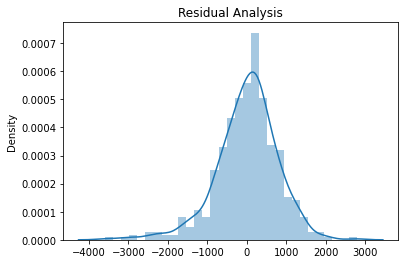

In [177]:
sns.distplot(y_train-y_train_pred)
plt.title("Residual Analysis")

Text(0, 0.5, 'y_train_pred')

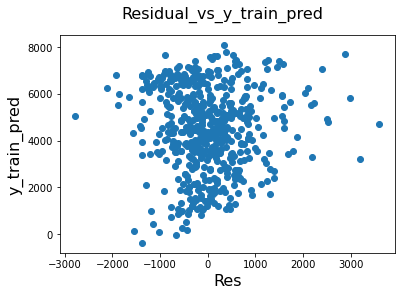

In [178]:
# understanding the spread target variable
plt.scatter(y_train_pred-y_train,y_train_pred)
plt.suptitle('Residual_vs_y_train_pred', fontsize =16)
plt.xlabel('Res', fontsize=16)              # X-label
plt.ylabel('y_train_pred', fontsize=16)  # y-label

Text(0, 0.5, 'y_train_pred')

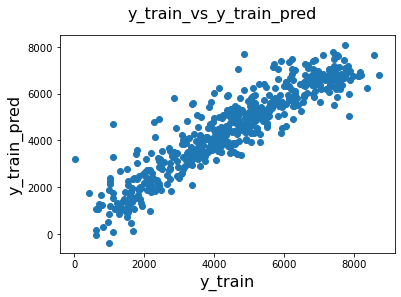

In [179]:
# understanding the model fit
plt.scatter(y_train,y_train_pred)
plt.suptitle('y_train_vs_y_train_pred', fontsize =16)
plt.xlabel('y_train', fontsize=16)         # X-label
plt.ylabel('y_train_pred', fontsize=16)    # y-label

In [180]:
# Scaling the Test data

#transform() --> using only formulation (x-xmin/(xmax-xmin)) don't make the test data to learn the max and min
bike_test[var] = scaler.transform(bike_test[var])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Misty,Snowy,...,december,february,january,july,june,march,may,november,october,september
184,0,1,0,0.831783,0.769660,0.657364,0.084219,6043,1,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,6211,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,2659,1,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,4968,0,0,...,0,0,0,0,1,0,0,0,0,0


In [181]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Misty,Snowy,...,december,february,january,july,june,march,may,november,october,september
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.475410,0.032787,0.726776,0.568688,0.542076,0.635166,0.316439,4630.786885,0.300546,0.032787,...,0.076503,0.087432,0.071038,0.125683,0.092896,0.049180,0.087432,0.081967,0.076503,0.087432
std,0.500765,0.178567,0.446837,0.234887,0.219336,0.152926,0.159371,1875.584487,0.459754,0.178567,...,0.266530,0.283242,0.257593,0.332401,0.291083,0.216838,0.283242,0.275067,0.266530,0.283242
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.362754,0.354867,0.522601,0.199183,3440.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.575304,0.558309,0.618721,0.303464,4656.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.774153,0.729061,0.735079,0.404383,5942.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## step 4: Predictions and Evaluation on the test set

In [182]:
y_test = bike_test.pop("cnt")
X_test = bike_test

In [183]:
X_test_sm = sm.add_constant(X_test)

In [184]:
X_test_sm = X_test_sm.drop(['june','atemp','hum','Sunny','may','tuesday','sunday','february','monday','thursday','wednesday','august','october','march','july','january','spring','november','december'],axis=1)

In [185]:
# prediction
y_test_pred = model.predict(X_test_sm)

In [186]:
# Evaluation
r2_score(y_true=y_test ,y_pred=y_test_pred)

0.7741898521799347

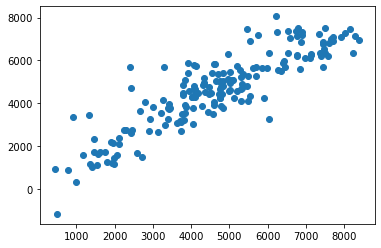

In [187]:
# understanding the spread target variable
plt.scatter(y_test,y_test_pred)

In [188]:
# Evaluation
r2_score(y_true=y_train ,y_pred=y_train_pred)

0.8398814714842932

## Model Selection using RFE

In [189]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [190]:
y_train_rfe=y_train
X_train_rfe = bike_train

In [191]:
bike_train.shape

(547, 30)

In [192]:
lin= LinearRegression()
lin.fit(X_train_rfe,y_train_rfe)

LinearRegression()

In [193]:
# RTE
rfe = RFE(lin,n_features_to_select=10)
rfe=rfe.fit(X_train_rfe,y_train_rfe)

In [194]:
list(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Misty', False, 4),
 ('Snowy', True, 1),
 ('Sunny', False, 3),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('monday', False, 12),
 ('saturday', False, 5),
 ('sunday', False, 15),
 ('thursday', False, 18),
 ('tuesday', False, 13),
 ('wednesday', False, 19),
 ('august', False, 16),
 ('december', False, 8),
 ('february', False, 10),
 ('january', False, 9),
 ('july', True, 1),
 ('june', False, 17),
 ('march', False, 21),
 ('may', False, 14),
 ('november', False, 7),
 ('october', False, 20),
 ('september', True, 1)]

In [195]:
col = X_train_rfe.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Snowy', 'spring',
       'winter', 'july', 'september'],
      dtype='object')

In [196]:
X_train_rfe.columns[~ rfe.support_]

Index(['workingday', 'atemp', 'Misty', 'Sunny', 'summer', 'monday', 'saturday',
       'sunday', 'thursday', 'tuesday', 'wednesday', 'august', 'december',
       'february', 'january', 'june', 'march', 'may', 'november', 'october'],
      dtype='object')

In [197]:
X_train_rfe = X_train_rfe[col]

In [198]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [199]:
Lin_Reg = sm.OLS(y_train_rfe,X_train_rfe)

In [200]:
Lin_Reg_model = Lin_Reg.fit()
Lin_Reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     267.3
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          5.30e-201
Time:                        00:09:27   Log-Likelihood:                -4431.6
No. Observations:                 547   AIC:                             8885.
Df Residuals:                     536   BIC:                             8933.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3294.4645    259.552     12.693      0.000    2784.602    3804.327
yr          1965.5293     69.846     28.141      0.000    1828.324    2102.734
holiday     -962.1910    212.943     -4.519      0.000   -1380.496    -543.886
temp        4502.7206    260.277     17.300      0.000    3991.432    5014.009
hum        -2384.5656    267.309     -8.921      0.000   -2909.667   -1859.465
windspeed  -1604.4060    217.856     -7.365      0.000   -2032.363   -1176.449
Snowy      -1734.5512    221.865     -7.818      0.000   -2170.383   -1298.719
spring      -911.7469    128.001     -7.123      0.000   -1163.192    -660.302
winter       595.1321    105.521      5.640      0.000     387.847     802.417
july        -713.2936    151.312     -4.714      0.000   -1010.531    -416.056
september    497.9299    133.492      3.730      0.000     235.698     760.162
==============================================================================
Omnibus:                       53.659   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.715
Skew:                          -0.587   Prob(JB):                     1.11e-23
Kurtosis:                       4.806   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [202]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.47
2,temp,13.06
4,windspeed,4.02
6,spring,2.51
0,yr,2.05
7,winter,1.96
8,july,1.37
9,september,1.20
5,Snowy,1.11
1,holiday,1.04


In [203]:
X_train_rfe = X_train_rfe.drop(["hum"],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
Lin_Reg = sm.OLS(y_train_rfe,X_train_rfe)
Lin_Reg_model = Lin_Reg.fit()
Lin_Reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     251.4
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          3.72e-186
Time:                        00:09:27   Log-Likelihood:                -4469.5
No. Observations:                 547   AIC:                             8959.
Df Residuals:                     537   BIC:                             9002.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1793.6597    211.609      8.476      0.000    1377.977    2209.343
yr          2022.6987     74.466     27.163      0.000    1876.418    2168.979
holiday     -917.8948    227.929     -4.027      0.000   -1365.637    -470.153
temp        4162.8560    275.668     15.101      0.000    3621.335    4704.377
windspeed  -1133.9884    226.315     -5.011      0.000   -1578.560    -689.417
Snowy      -2240.9135    229.638     -9.758      0.000   -2692.012   -1789.815
spring      -938.5230    137.009     -6.850      0.000   -1207.662    -669.384
winter       462.8365    111.856      4.138      0.000     243.107     682.566
july        -550.4064    160.821     -3.422      0.001    -866.321    -234.491
september    402.7706    142.469      2.827      0.005     122.906     682.635
==============================================================================
Omnibus:                       64.328   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.296
Skew:                          -0.714   Prob(JB):                     2.05e-26
Kurtosis:                       4.776   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,32.84
3,temp,2.83
6,spring,2.63
7,winter,1.70
8,july,1.26
9,september,1.10
4,windspeed,1.07
5,Snowy,1.03
1,yr,1.02
2,holiday,1.02


In [205]:
y_train_rfe_pred = Lin_Reg_model.predict(X_train_rfe)

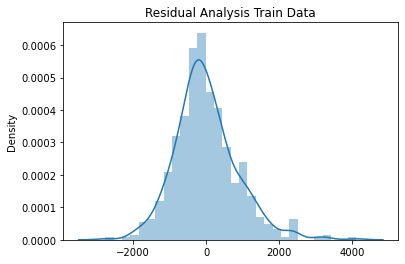

In [206]:
plt.title("Residual Analysis Train Data")
sns.distplot(y_train_rfe_pred-y_train_rfe)
plt.show()

- error term shows normal distribution with mean "0"

Text(0, 0.5, 'y_train_rfe_pred')

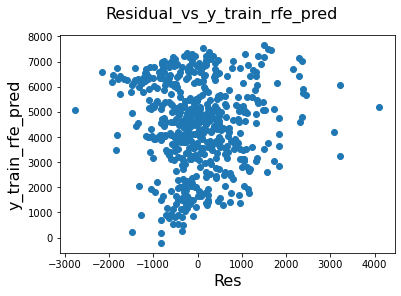

In [207]:
# understanding the spread target variable
plt.scatter(y_train_rfe_pred-y_train_rfe,y_train_rfe_pred)
plt.suptitle('Residual_vs_y_train_rfe_pred', fontsize =16)
plt.xlabel('Res', fontsize=16)              # X-label
plt.ylabel('y_train_rfe_pred', fontsize=16)  # y-label

- error term is not following any specific patterns and spreaded 

Text(0, 0.5, 'y_train_rfe_pred')

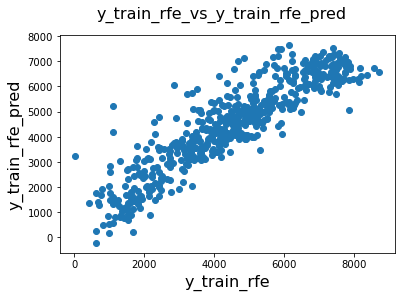

In [208]:
# understanding the model fit
plt.scatter(y_train_rfe,y_train_rfe_pred)
plt.suptitle('y_train_rfe_vs_y_train_rfe_pred', fontsize =16)
plt.xlabel('y_train_rfe', fontsize=16)         # X-label
plt.ylabel('y_train_rfe_pred', fontsize=16)    # y-label

- this is to confirm that the model fit is not by chance it predicted decently

In [209]:
var_rfe =['workingday', 'atemp', 'Misty', 'Sunny', 'summer', 'monday', 'saturday',
       'sunday', 'thursday', 'tuesday', 'wednesday', 'august', 'december',
       'february', 'january', 'june', 'march', 'may', 'november', 'october','hum']

In [210]:
y_test_rfe = y_test
X_test_rfe = bike_test

In [211]:
X_test_rfe = X_test_rfe.drop(var_rfe,axis=1)

In [212]:
X_test_rfe = sm.add_constant(X_test_rfe)
y_test_rfe_pred = Lin_Reg_model.predict(X_test_rfe)

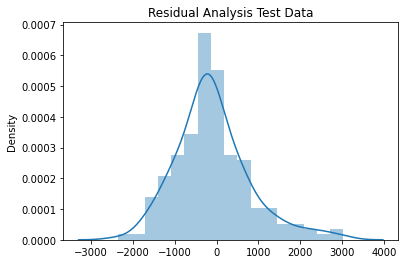

In [213]:
plt.title("Residual Analysis Test Data")
sns.distplot(y_test_rfe_pred-y_test_rfe)
plt.show()

- error term shows normal distribution with mean "0"

Text(0, 0.5, 'y_test_rfe_pred')

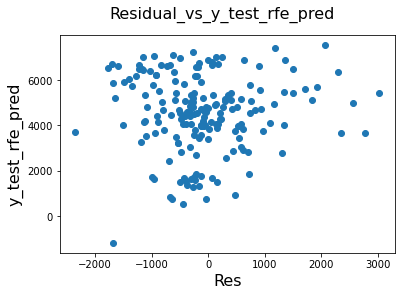

In [214]:
# understanding the spread target variable
plt.scatter(y_test_rfe_pred-y_test_rfe,y_test_rfe_pred)
plt.suptitle('Residual_vs_y_test_rfe_pred', fontsize =16)
plt.xlabel('Res', fontsize=16)              # X-label
plt.ylabel('y_test_rfe_pred', fontsize=16)  # y-label

- error term is not following any specific patterns and spreaded 

Text(0, 0.5, 'y_test_rfe_pred')

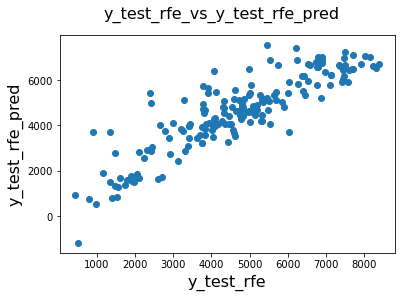

In [215]:
# understanding the model fit
plt.scatter(y_test_rfe,y_test_rfe_pred)
plt.suptitle('y_test_rfe_vs_y_test_rfe_pred', fontsize =16)
plt.xlabel('y_test_rfe', fontsize=16)         # X-label
plt.ylabel('y_test_rfe_pred', fontsize=16)    # y-label

- this is to confirm that the model fit is not by chance it predicted decently and having conatnat variance

In [216]:
# Evaluation R2 score of Test data set
r2_score(y_true=y_test_rfe ,y_pred=y_test_rfe_pred)

0.7715188407267742

In [217]:
# Evaluation R2 score of Train data set
r2_score(y_true=y_train_rfe ,y_pred=y_train_rfe_pred)

0.8081996809804208

In [218]:
final = pd.concat([y_train,X_train],axis=1)
final.corr()

,cnt,yr,holiday,workingday,temp,windspeed,Misty,Snowy,summer,winter,saturday,september
cnt,1.000000,0.573177,-0.118934,0.109079,0.648869,-0.247968,-0.153314,-0.216487,0.146895,0.065160,-0.009970,0.207293
yr,0.573177,1.000000,0.008433,0.031001,0.088690,0.002390,0.007124,-0.058742,-0.000870,-0.009373,-0.022249,0.008579
holiday,-0.118934,0.008433,1.000000,-0.238776,-0.084239,0.033720,-0.029063,-0.028195,-0.069617,0.034499,-0.071018,0.032657
workingday,0.109079,0.031001,-0.238776,1.000000,0.077518,-0.037159,0.042390,0.022921,0.048242,-0.033064,-0.601425,0.007992
temp,0.648869,0.088690,-0.084239,0.077518,1.000000,-0.178178,-0.074894,-0.033593,0.151235,-0.206407,-0.041791,0.214239
windspeed,-0.247968,0.002390,0.033720,-0.037159,-0.178178,1.000000,-0.022289,0.085535,0.097268,-0.098239,0.055756,-0.115062
Misty,-0.153314,0.007124,-0.029063,0.042390,-0.074894,-0.022289,1.000000,-0.122993,0.046460,0.028626,0.010885,0.051272
Snowy,-0.216487,-0.058742,-0.028195,0.022921,-0.033593,0.085535,-0.122993,1.000000,-0.043588,0.112586,0.022589,0.032657
summer,0.146895,-0.000870,-0.069617,0.048242,0.151235,0.097268,0.046460,-0.043588,1.000000,-0.324455,-0.027639,-0.168469
winter,0.065160,-0.009373,0.034499,-0.033064,-0.206407,-0.098239,0.028626,0.112586,-0.324455,1.000000,0.019755,-0.012172
